<a href="https://colab.research.google.com/github/KyleEtera/MAT422/blob/main/2_2_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

dataset = datasets.load_breast_cancer(as_frame = True)
data = dataset.data

**2.2.1 Probability Axioms** - In probability and statistics, we deal with sample spaces. These sample spaces, 𝐒, are the set of all possible outcomes for an experiment, these possible outcomes are called events. We assign these events a value, or probability, P(A) given by a probability distribution function.

These values must satisfy these requirements:


* For any event A, 1 >= P(A) >= 0
* P(S) = 1
* If A1, A2, A3,... is an infinite collection of disjoint events then P(A1 ∪ A2 ∪ A3 ∪...) = ∑P(Ai) where i=1 to infinity
* For any event A, P(A) + P(A') = 1, from which P(A) = 1 - P(A')
* When events A and B are mutually exclusive, P(A ∪ B) = P(A) + P(B)
* For any two events A and B, P(A ∪ B) = P(A) + P(B) - P(A ∩ B)

If there are N equally likely outcomes, the probability for each is 1/N. For an event A, with N(A) number of outcomes, we find that P(A) = N(A)/N

**2.2.2 Conditional Probability** - For any two events, A and B, where P(B) > 0, we can find the conditional probability of A given that B has occured, P(A|B) = P(A∩B) / P(B).

From this we can also find that P(A ∩ B) = P(A|B) · P(B). This is the multiplication rule.

If A and B are independent, then P(A|B) = P(A) and P(A∩B) = P(A) · P(B). This idea can be extended to any number of events.

29.7 %		 46.05 %	 29.7 %


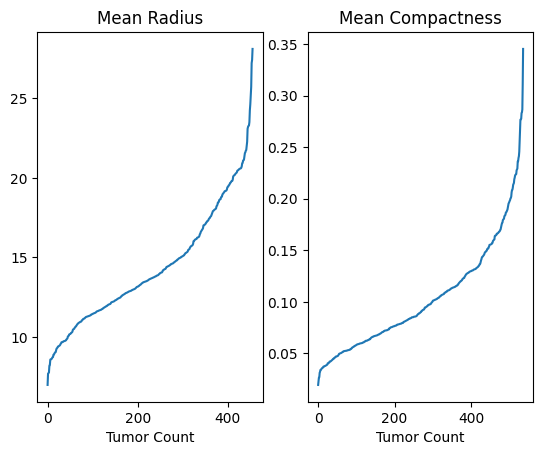

In [81]:
figure, axis = plt.subplots(1,2)
axis[0].plot(sorted(data["mean radius"].unique()))
axis[0].set_title("Mean Radius")
axis[0].set_xlabel("Tumor Count")
axis[1].plot(sorted(data["mean compactness"].unique()))
axis[1].set_title("Mean Compactness")
axis[1].set_xlabel("Tumor Count")

mean_Radius = data[data["mean radius"] < 12].shape[0] / data.shape[0]
mean_Compactness = data[data["mean compactness"] > 0.1].shape[0] / data.shape[0]
mean_Rad_given_Compact = data[(data["mean radius"] < 12) & (data["mean compactness"])].shape[0] / data.shape[0]
print(round(mean_Radius * 100, 2), "%\t\t",
      round(mean_Compactness * 100, 2), "%\t",
      round(mean_Rad_given_Compact * 100, 2), "%")

**Discrete Random Variables** - A random variable is dependent on the outcome of a random phenomenon. In other words it's a function that exists in our sample space. There are two types of these, the first is discrete. This is a finite set of an infinite sequence, often consisting of counted values such as the number of cancer patients or the number of tumors.

The probability distribution or probability mass function (pmf) of a discrete random variable is p(x) = P(X=x) = P(∀s∈S:X(s)=x).

The cumulative distribution function (cdf) F(x) of a discrete random variable X with pmf p(x) is F(x)=P(X<=x)=∑p(y) for y:y<=x.

Bernoulli Distribution - A special type of distribution with only two possible outcomes. Often Bernoulli experiments with outcomes S (success) and F (failure). With a pmf b(x;n,p)=(n x)pˣ(1-p)ʸ or 0 where p is the probability of success and y=n-x for x=0,1,2,3,...,n. Otherwise it is 0. It's cdf is b(x;n,p)=P(X<=x)=∑b(x;n,p) with y<=x = ∑(n y)pˣ(1-p)ʸ from y=0 to x. It's mean value is E(X)=np, variance V(X)=np(1-p), and standard deviation σₓ^2=np(1-p).

Poisson Distribution - A special type of distribution with a number of events occuring with a constant mean rate and independent of the time of the last event. With a pmf p(x;μ)=e^-mu * μˣ / x! where x = 0,1,2,3,... . It's mean value is E(X)=μ and variance V(X)=μ.

The mean value of a random variable, X, whose set of possible values, D, and pmf p(x), is E(X)=μₓ=∑x⋅p(x) where x∈D.

The variance is V(X)=∑(x-μ)^2⋅p(x)=E[(X-μ)^2]

**Continuous Random Variables** - The second type is continuous. This is an interval on a number line, often consisting of measured values. This could be the radius, perimeter, area or compactness of the tumors. These must satisfy two rules:


* The set of possible values must consist of numbers in a single interval on the number line
* P(X=C)=0 for any possible value individual c.


The probability density funcation (pdf) of X is a function f(x) such that for two numbers a and b with a<=b we get P(a<=X<=b)=∫f(x)dx from a to b.

The expected value is E(x)=∫x⋅f(x)dx from -∞ to ∞. The variance is V(X)=∫(x-μ)^2⋅f(x)dx from -∞ to ∞ = E[(X-μ)^2]. The standard deviation is σₓ^2=V(X).

Exponential Distribution - It's pdf is f(x;λ)=λe^(-λx) where x>=0 or f(x;λ)=0. It's mean value is E(X)=∫xλe^(-λx)dx from 0 to ∞. It's mean and standard deviation are μ=σ=1/λ.

Normal Distribution - Often used to represent real-valued random variables with unknown distributions. It's pdf is f(x;μ,σ)=1/(sqrt(2π)σ)e^(-(x-μ)^2/(2σ^2))dx. When μ=0 and σ=1 this is called the standard normal distribution. The pdf of this standard normal random variable is f(z;0,1)=1/sqrt(2π)e^(-z^2/2) where -∞< z <∞. It's cdf is P(Z<=z)∫f(y;0,1)dy from -∞ to z. We can standardize any normal distribution by (X-μ)/σ.